<a href="https://colab.research.google.com/github/rakib06/AI/blob/master/Lab%204%20-%20rk-%20Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improving Computer Vision Accuracy using Convolutions



 experimented with the impact of different sized of hidden layer, number of training epochs etc on the final accuracy.



In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4983 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3808 - accuracy: 0.8632
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3404 - accuracy: 0.8759
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3146 - accuracy: 0.8849
Epoch 5/5
313/313 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8741


In [2]:
test_loss

[0.3549737334251404, 0.8741000294685364]

accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better? One way is to use something called Convolutions. I'm not going to details on Convolutions here, but the ultimate concept is that they narrow down the content of the image to focus on specific, distinct, details.


In [6]:

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64 , (3,3), activation='relu', input_shape=(28,28,1)), # 64 = total filters
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')

])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [7]:
model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4392 - accuracy: 0.8402
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2912 - accuracy: 0.8935
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2490 - accuracy: 0.9086
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2151 - accuracy: 0.9208
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1879 - accuracy: 0.9298


In [8]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2636 - accuracy: 0.9025


In [9]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


[<tf.Tensor 'conv2d_1/Relu:0' shape=(None, 26, 26, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'conv2d_2/Relu:0' shape=(None, 11, 11, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(None, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'flatten_2/Reshape:0' shape=(None, 1600) dtype=float32>,
 <tf.Tensor 'dense_4/Relu:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_5/Softmax:0' shape=(None, 10) dtype=float32>]

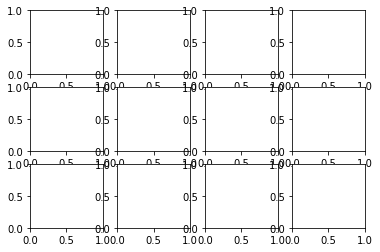

In [23]:
import matplotlib.pyplot as plt

FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

In [18]:
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
activation_model

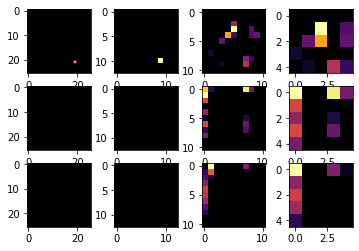

In [32]:
f, axarr = plt.subplots(3,4)
for x in range (0, 4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')